# RECHERCHE OPERATIONNELLE - PROJET 
#### Groupe 2 - Mattéo BOULITEAU -  Kagnana ITH - Nejma MOUALHI


# Table des matières
- [Contexte](#contexte)
- [Problématique](#problématique)
- [Contraintes](#contraintes)
- [Livrables attendus](#livrables-attendus)
- [Caractéristiques du problème](#caractéristiques-du-problème)
- [1. Modélisation du TSP](#1-modélisation-du-TSP)
   - [1.1. Données](#11-données)
   - [1.2. Variables de décision](#12-variables-de-décision)
   - [1.3. Fonction objectif](#13-fonction-objectif)
   - [1.4. Contraintes](#14-contraintes)

- [2. Méthode de résolution](#2-méthode-de-résolution)
   - [2.1. Méthode exacte : Programme linéaire en nombres entiers (PLNE)](#21-méthode-exacte--programme-linéaire-en-nombres-entiers-plne)
      - [2.1.1. Description de la méthode PLNE](#211-description-de-la-méthode-plne)
      - [2.1.2. Solveur CPLEX](#212-solveur-cplex)
      - [2.1.3. Résultats de la méthode PLNE](#213-résultats-de-la-méthode-plne)
   - [2.2. Méthode heuristique ](#22-méthode-heuristique)
   - [2.2. Métaheuristique : GRASP](#222-métaheuristique--grasp)
 
- [3. Solution choisie](#3-solution-choisie)
    - [3.1. Justification de la solution choisie](#31-justification-de-la-solution-choisie)
      - [3.1.1. Comparaison des méthodes](#311-comparaison-des-méthodes)
    - [3.2. Présentation de la solution choisie](#32-présentation-de-la-solution-choisie)

- [4. Implémentation de la méthode choisie](#4-implémentation-de-la-méthode-choisie)
    ...

- [5. Conclusion](#5-conclusion)
   - [5.1. Analyse des résultats](#51-analyse-des-résultats)



- [Bibliographie](#bibliographie)



## Contexte
L’ADEME a lancé un appel à manifestation d’intérêt pour expérimenter de nouvelles solutions de mobilité adaptées aux territoires.

Nous sommes CesiCDP, déjà engagés dans la mobilité multimodale intelligente, et nous répondons à cet appel pour obtenir de nouveaux financements. Le projet vise à réduire les déplacements et la consommation des véhicules lors des livraisons, en résolvant un problème algorithmique d’optimisation de tournée sur un réseau routier.

## Problématique
Nous nous demandons comment optimiser les tournées de livraison pour réduire les déplacements et la consommation des véhicules. Nous devons prendre en compte plusieurs contraintes, telles que la capacité des véhicules, les fenêtres de temps pour les livraisons, et la distance entre les points de livraison.

## Contraintes
Nous avons décidé de rajouter des contraintes pour rendre le problème plus réaliste en se basant sur un système de livraison de colis. Voici les contraintes que nous avons retenues :
1. **Fenêtres temporelles (Time Windows)** : 
    - Chaque ville doit être visitée dans un certain intervalle de temps. Par exemple, si une ville est disponible uniquement de 8 h à 10 h, le parcours doit respecter cette contrainte.
2. **Routes dynamiques ou perturbations** : Les routes peuvent changer pendant la tournée (ex : accidents, météo, fermeture soudaine).
    - Simuler des perturbations dans les données.

## Livrables attendus
1. Modélisation

2. Livrable final du projet

## Caractéristiques du problème

- **Variables de décision** : $x_{ij}$  
    $x_{ij}$ représente si le trajet entre la ville $i$ et la ville $j$ est emprunté ou non.

- **Contraintes** : 
    - Chaque ville doit être visitée une seule fois.
    - Le point de départ et d'arrivée doit être le même.
    - Fenêtre temporelles : Chaque ville doit être visitée dans un certain intervalle de temps.
    - Routes dynamiques et perturbations : Prévision de perturbations dans les données.

- **Objectif** : Trouver un itinéraire optimisé qui nous permet de passer par toutes les villes de la tournée en une seule fois et retourner au point de départ.

Une fois que nous avons explicité le problème, nous allons le modéliser de manière mathématique.  
Nous remarquons que notre problème est une version métrique du problème du voyageur de commerce (TSP) avec des contraintes supplémentaires le rendant plus réaliste.

### Version algorithmique du problème :

- **Donnée** : Un graphe complet pondéré $G(S, A)$ avec un ensemble de sommets $S$ et un ensemble d'arêtes $A$.
- **Tâche** : Trouver un cycle hamiltonien dans $G$ en minimisant la somme des poids des arêtes du cycle.

## 1 - Modélisation du TSP

### 1.1 Données

- Un ensemble de villes $V = \{v_1, v_2, \ldots, v_n\}$
- Un graphe complet pondéré $G = (V, E)$
- Une fonction de coût $c_{ij} \geq 0$, représentant la distance ou le temps entre les villes $i$ et $j$

La nature du graphe est la suivante :
- On reste sur un graphe complet : on suppose qu'il existe une route (au moins théorique) entre chaque paire de villes. 

### 1.2 Variables de décision

- $x_{ij} \in \{0,1\}$ : vaut 1 si l'on va de la ville $i$ à la ville $j$, 0 sinon

### 1.3 Fonction objectif

Minimiser la somme des coûts de déplacement :

$$\min \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \cdot x_{ij}$$

### 1.4 Contraintes

1. Chaque ville est quittée une seule fois :

$$\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}$$

2. Chaque ville est visitée une seule fois :

$$\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}$$

3. Time windows, chaque ville doit être visitée dans un certain intervalle de temps :
$$\forall i \in \{1, \dots, n\}, \quad s_i \leq t_i \leq e_i$$
où : 
- $s_i$ est le début de la fenêtre temporelle pour la ville $i$
- $t_i$ est le temps d'arrivée à la ville $i$
- $e_i$ est la fin de la fenêtre temporelle pour la ville $i$

4. Routes dynamiques ou perturbations :
$$\forall i,j \in \{1, \dots, n\}, \quad c_{ij} = c_{ij}(t)$$
où $c_{ij}(t)$ est la distance entre les villes $i$ et $j$ à l'instant $t$. Cette contrainte permet de prendre en compte les changements de conditions de circulation.

5. Le point de départ et d'arrivée doit être le même :
$$\sum_{i=1}^{n} x_{0i} = 1$$
$$\sum_{j=1}^{n} x_{j0} = 1$$

---

Ce problème est connu pour être **NP-difficile** : il n'existe pas d'algorithme polynomial connu permettant de le résoudre dans le cas général. 
Nous allons nous intéresser à des algorithmes d'approximation, ou méta-heuristiques, qui permettent de trouver des solutions approchées en un temps raisonnable.

## 2 - Méthode de résolution
Dans un premier temps, nous allons aborder la méthode exacte, qui est la méthode de programmation linéaire en nombres entiers (PLNE).

### 2.1 Méthode exacte : Programme linéaire en nombres entiers (PLNE)
#### 2.1.1 Description de la méthode PLNE
La méthode PLNE consiste à modéliser le problème sous forme de programme linéaire, en utilisant des variables de décision binaires pour représenter les choix de parcours entre les villes.

#### 2.1.2 Solveur CPLEX
Le solveur CPLEX est un outil puissant pour résoudre des problèmes d'optimisation linéaire et entière. Il utilise des algorithmes avancés pour trouver des solutions optimales ou approchées à des problèmes complexes.

Nous allons générer les données pour le problème du TSP, puis utiliser CPLEX pour résoudre le problème. 


In [384]:
def generate_data(n, weight_range, time_range, min_time_gap, max_percentage_perturbation, max_edges_perturbated):
    """
    Generates a complete ponderate graph with time windows for each node.

    :param n: Number of nodes to generate
    :param weight_range: Tuple (min_weight, max_weight) for edge weights in minutes
    :param time_range: Tuple (min_time, max_time) for time window limits
    :param min_time_gap: Minimum gap between start and end time for each node
    :param max_percentage_perturbation: Maximum percentage of perturbation for the weights in decimal
    0.0 <= max_percentage_perturbation <= 1.0
    :param max_edges_perturbated: Maximum number of edges that can be perturbated
    :return: complete ponderate graph with time windows
    """

    import random

    # Create a complete ponderate graph
    graph = {}
    time_windows = {}
    perturbated_edges = [] # Counter for perturbated edges

    for i in range(n):
        graph[i] = {}
        for j in range(n):
            if i != j:
                # Random weight between min_weight and max_weight
                weight = random.randint(weight_range[0], weight_range[1])

                # Apply perturbation if within the allowed number of perturbated vectors
                if len(perturbated_edges) < max_edges_perturbated and random.random() < max_percentage_perturbation:
                    perturbation_factor = random.uniform(1.0, 1.0 + max_percentage_perturbation)
                    
                    weight = int(weight * perturbation_factor)  # Apply a random perturbation
                    perturbated_edges.append((i, j))  # Store the perturbated edge

                graph[i][j] = weight  # Weight of the edge is the weight of the item

        # Generate time windows for each node
        start_time = random.randint(time_range[0], time_range[1] - min_time_gap)
        end_time = start_time + min_time_gap
        time_windows[i] = (start_time, end_time)

    return graph, time_windows, perturbated_edges

# Example usage
graph, time_windows, perturbated_edges = generate_data(5, (1, 1440), [0, 20], 5, 0.2, 2)
print("Generated Graph:", graph)
print("Time Windows:", time_windows)
print("Perturbated Edges:", perturbated_edges)

Generated Graph: {0: {1: 1116, 2: 1232, 3: 61, 4: 215}, 1: {0: 1186, 2: 118, 3: 605, 4: 758}, 2: {0: 868, 1: 354, 3: 752, 4: 965}, 3: {0: 195, 1: 710, 2: 408, 4: 906}, 4: {0: 1167, 1: 111, 2: 454, 3: 1039}}
Time Windows: {0: (5, 10), 1: (1, 6), 2: (10, 15), 3: (7, 12), 4: (1, 6)}
Perturbated Edges: [(0, 3), (1, 3)]


Pour nous permettre de visualiser les résultats, nous allons également utiliser la bibliothèque Matplotlib pour tracer le graphe du TSP et afficher la solution trouvée par CPLEX.

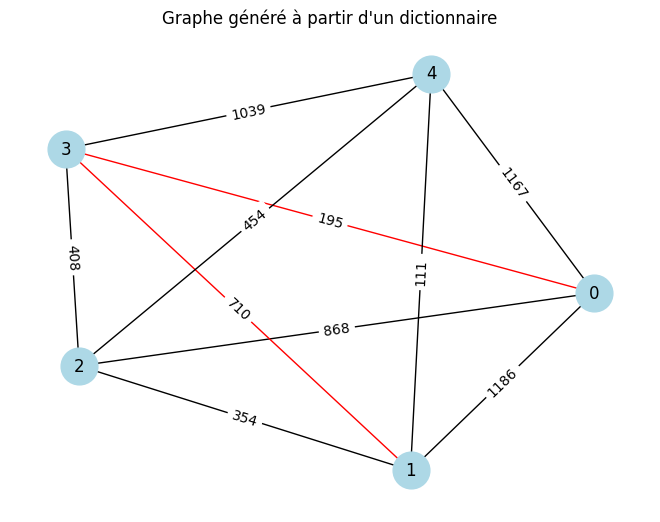

In [385]:
import networkx as nx
import matplotlib.pyplot as plt

def dict_to_graph(graph_dict):
    G = nx.Graph()  # For non oriented graph
    for node, neighbors in graph_dict.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

# Creation
G = dict_to_graph(graph)

edge_colors = ['red' if (u, v) in perturbated_edges or (v, u) in perturbated_edges else 'black' for u, v in G.edges]

# Display
pos = nx.spring_layout(G, seed=42)  # set the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graphe généré à partir d'un dictionnaire")
plt.show()


Ensuite nous allons utiliser le solveur CPLEX pour résoudre le problème du TSP en utilisant la modélisation PLNE.

Nous utilisons le package `docplex` de CPLEX pour modéliser et résoudre le problème.

Il faut installer le package `docplex` et `cplex` pour utiliser CPLEX. 

In [386]:
from docplex.mp.model import Model

def use_solver(graph): 
    model = Model("tsp")
    n = len(graph)

    # define decision variables
    x = model.binary_var_matrix(n, n, name="x")
    time = model.continuous_var_list(n, name="time") # time at which each node is visited

    # define objective function
    model.minimize(model.sum(graph[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j))

    # define constraints
    for i in range(n):
        model.add_constraint(model.sum(x[i, j] for j in range(n) if i != j) == 1, f"out_one_time_{i}")
        model.add_constraint(model.sum(x[j, i] for j in range(n) if i != j) == 1, f"in_one_time_{i}")

        for j in range(n):
            if i != j:
                model.add_constraint(x[i, j] + x[j, i] <= 1, f"no_bidirectional_{i}_{j}")

        # Ensure the first edge of the cycle is also the last edge
        model.add_constraint(model.sum(x[0, j] for j in range(1, n)) == 1, "start_at_0")
        model.add_constraint(model.sum(x[j, 0] for j in range(1, n)) == 1, "end_at_0")

        # time window constraints
        start_time, end_time = time_windows[i]
        # time[i] must be within the time window
        model.add_constraint(time[i] >= start_time * 60, f"time_window_start_{i}")
        model.add_constraint(time[i] <= end_time * 60, f"time_window_end_{i}")

    # Solve the model
    solution = model.solve(log_output=False)
    if solution:
        solution_list = []
        print("Solution found:")
        for i in range(n):
            for j in range(n):
                # Check if the edge is part of the solution
                # 0.5 is the threshold for binary variables
                if x[i, j].solution_value > 0.5:
                    solution_list.append((i, j))
                    print(f"Edge from {i} to {j} with weight {graph[i][j]} minutes")


        cycle = [0] # Start from the first node
        # Reconstruct the cycle
        visited = set(cycle) 
        # Because the solution is not necessarily a cycle that visits all nodes
        while len(visited) < n:
            for edge in solution_list:
                if edge[0] == cycle[-1] and edge[1] not in visited:
                    cycle.append(edge[1])
                    visited.add(edge[1])
                    break

        cycle.append(0) # add the end node to complete the cycle

        print ("Cycle:", cycle)
        print("Total weight:", model.objective_value / 60, "hours")
    else:
        print("No solution found.")

use_solver(graph)

Solution found:
Edge from 0 to 4 with weight 215 minutes
Edge from 1 to 2 with weight 118 minutes
Edge from 2 to 3 with weight 752 minutes
Edge from 3 to 0 with weight 195 minutes
Edge from 4 to 1 with weight 111 minutes
Cycle: [0, 4, 1, 2, 3, 0]
Total weight: 23.183333333333334 hours


# Bibliographie

1. **Voyageur de commerce - Approche métrique**  
    [https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf](https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf)

2. **Recherche opérationnelle - F. Olive**  
    [https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf](https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf)

3. **Recherche opérationnelle - Nicolas Bousquet**  
    [https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf](https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf)

4. **Le voyageur de commerce**  
    [http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf](http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf)